In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/IRIS.csv')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


PREPROCCESSING THE DATASET

CHECK FOR NULL VALUES

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

DATA VISUALISATION

EXPLORATORY DATA ANALYSIS

HISTOGRAMS

<Axes: >

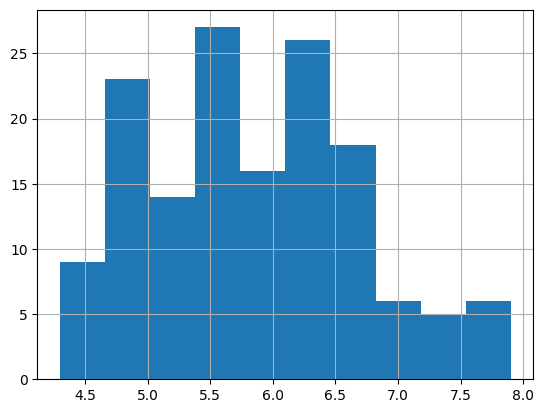

In [ ]:
df['sepal_length'].hist()

In [ ]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

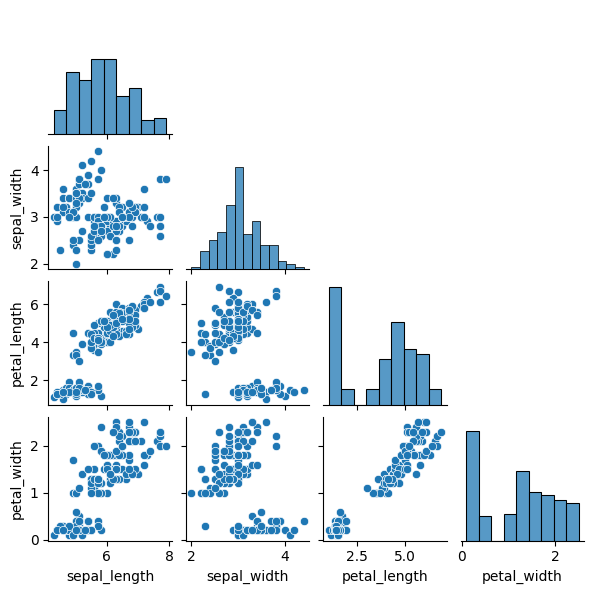

In [ ]:
sns.pairplot(df , diag_kind = "hist", height = 1.5 , corner = True)

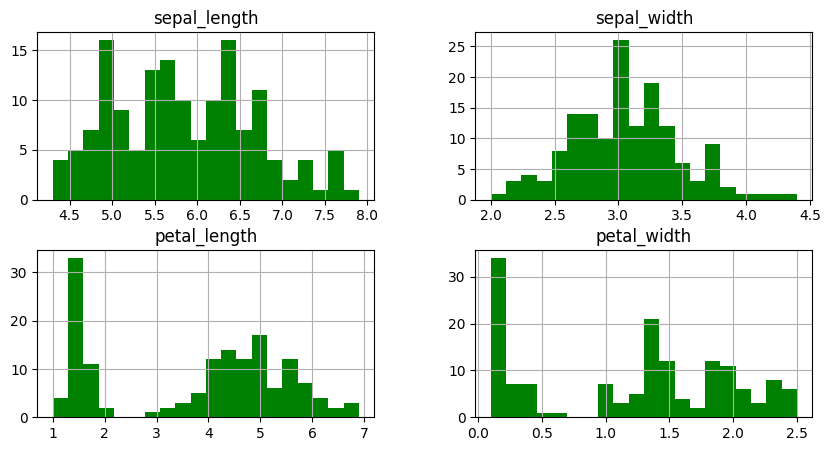

In [ ]:
df.hist(bins=20, figsize=(10, 5) , color = "green")
plt.show()

SCATTERPLOT

<Axes: xlabel='sepal_length', ylabel='petal_length'>

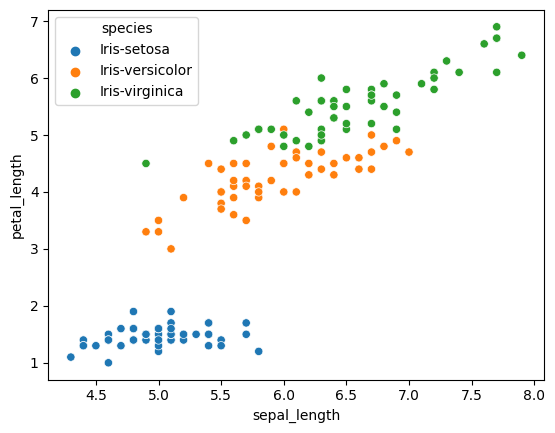

In [ ]:
sns.scatterplot(data=df, x='sepal_length', y='petal_length', hue='species')

<Axes: xlabel='sepal_width', ylabel='petal_width'>

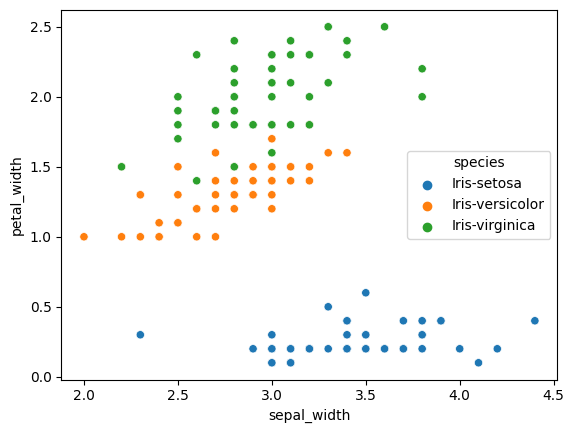

In [ ]:
sns.scatterplot(data=df, x='sepal_width', y='petal_width', hue='species')

In [ ]:
colors = ["orange", "blue", "green"]
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

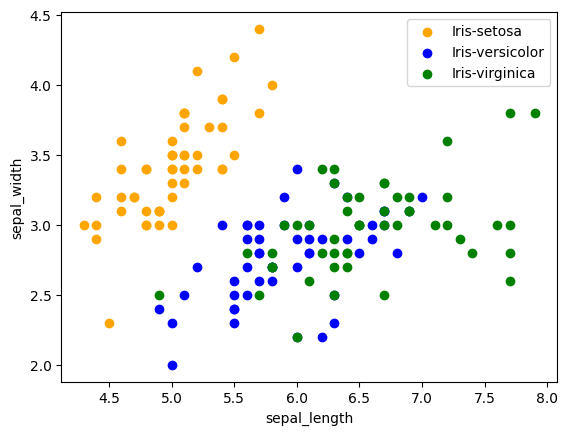

In [ ]:
for i in range(3):
  x = df[df['species'] == species[i]]
  plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label = species[i])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()

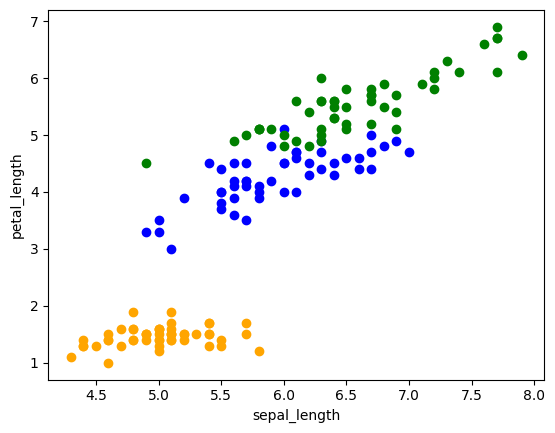

In [ ]:
for i in range(3):
  x = df[df['species'] == species[i]]
  plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label = species[i])
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.show()

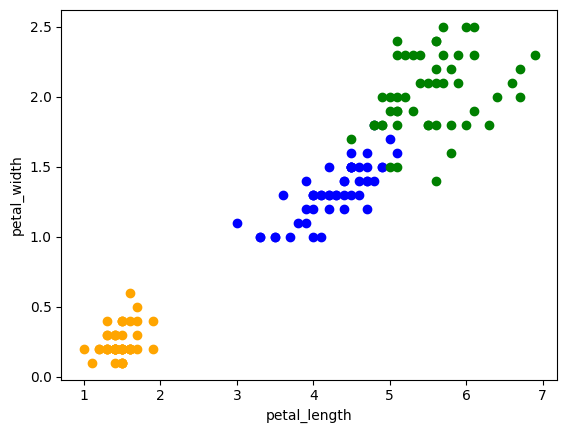

In [ ]:
for i in range(3):
  x = df[df['species'] == species[i]]
  plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label = species[i])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

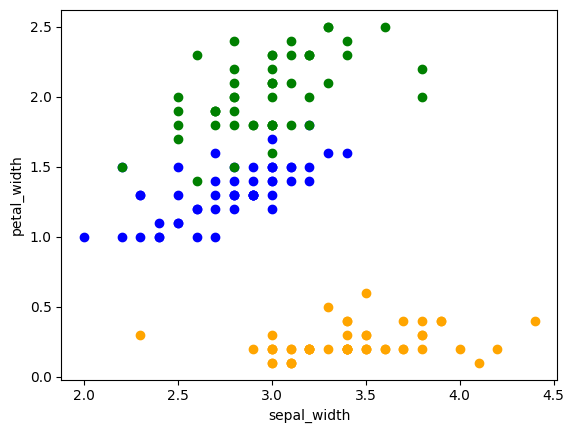

In [ ]:
for i in range(3):
  x = df[df['species'] == species[i]]
  plt.scatter(x['sepal_width'], x['petal_width'], c = colors[i], label = species[i])
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.show()

CORRELATION MATRIX

In [ ]:
df.corr()

<ipython-input-23-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

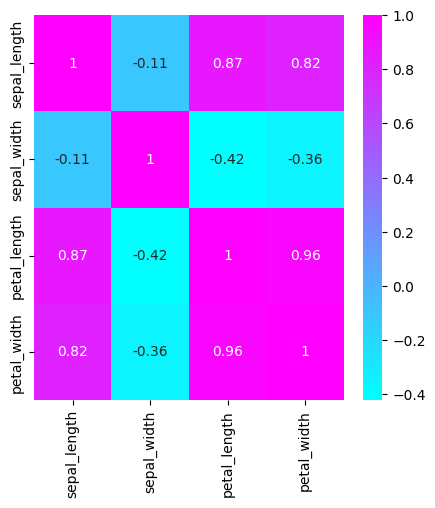

In [ ]:
numeric_columns=df.drop(columns='species')
corr=numeric_columns.corr()
fig,axis=plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot=True,ax=axis,cmap='cool')

LABEL ENCODER

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [ ]:
# display datatypes of each attribute
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object

MODEL TRANING

In [ ]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
x = df.drop(columns = ['species'])
y = df['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=42)

In [ ]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [ ]:
print("Shape of training data is:",x_train.shape)
print('Shape of training label is:',y_train.shape)
print('Shape of testing data is:',x_test.shape)
print('Shape of testing label is:',y_test.shape)

Shape of training data is: (105, 4)
Shape of training label is: (105,)
Shape of testing data is: (45, 4)
Shape of testing label is: (45,)


LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
x_test

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [ ]:
y_predict = model.predict(x_test)
y_predict

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

METRIC PERFORMANCE

In [ ]:
print("Accuracy:", model.score(x_test, y_test) * 100)

Accuracy: 100.0


KNN-K NEAREST NEIGHBOURS

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [ ]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
22     0
15     0
65     1
11     0
42     0
146    2
51     1
27     0
4      0
32     0
142    2
85     1
86     1
16     0
10     0
Name: species, dtype: int64

In [ ]:
print("Accuracy:", model.score(x_test, y_test) * 100)

Accuracy: 100.0


DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [ ]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
print("Accuracy:", model.score(x_test, y_test) * 100)

Accuracy: 100.0


In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
dt_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(x_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


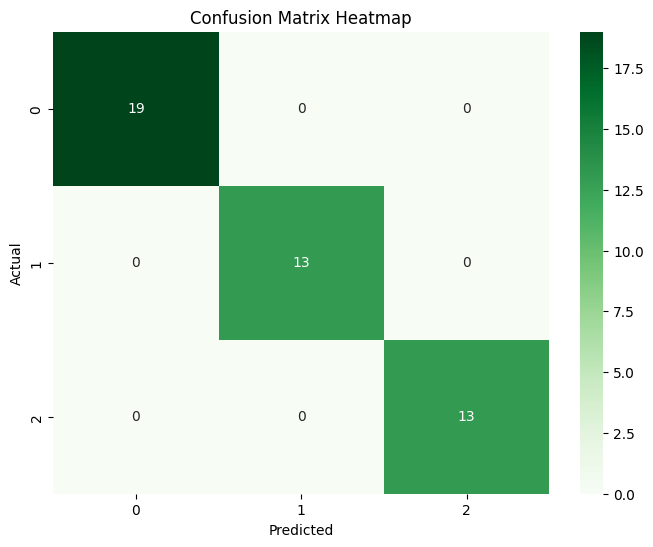

In [ ]:
c_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix, annot=True, fmt="d", cmap="Greens")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

MODEL EVALUATION

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 100.00%
